In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#load_data
train_data = pd.read_csv('../../DATA/data.csv')

In [3]:
train_data.head()

,ArticleId,Text,Category
0,14,One man's claims that he scammed people on the...,TECH
1,18,Maury Wills who helped the Los Angeles Dodgers...,SPORTS
2,21,For the past 18 months Hollywood has effective...,ENTERTAINMENT
3,22,President issues vow as tensions with China rise.,POLITICS
4,25,An annual celebration took on a different feel...,POLITICS


In [4]:
print("NUMBER OF DATA POINTS -",train_data.shape[0])
print("NUMBER OF FEATURES -",train_data.shape[1])
print("FEATURES -",train_data.columns.values)

NUMBER OF DATA POINTS - 64351
NUMBER OF FEATURES - 3
FEATURES - ['ArticleId' 'Text' 'Category']


In [5]:
train_data['Category'].value_counts()

POLITICS         34696
ENTERTAINMENT    16953
BUSINESS          5753
SPORTS            4933
TECH              1958
Name: Category, dtype: int64

In [6]:
#checking_null_values
train_data.isna().sum()

ArticleId       0
Text         7328
Category       58
dtype: int64

In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [9]:
target_category = train_data['Category'].unique()
print(target_category)

['TECH' 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'BUSINESS']


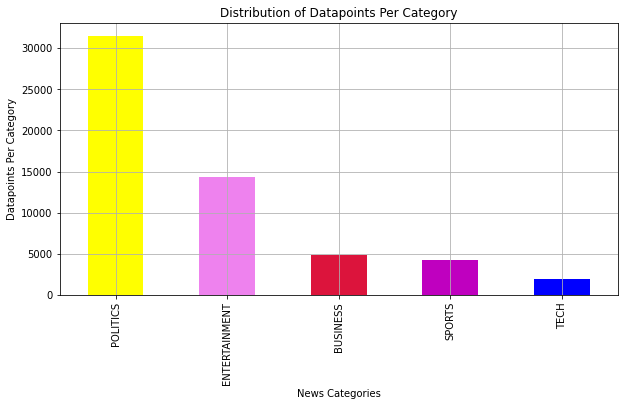

In [10]:
news_cat = train_data['Category'].value_counts()

plt.figure(figsize=(10,5))
my_colors = ['yellow','violet','crimson','m','b']
news_cat.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("News Categories")
plt.ylabel("Datapoints Per Category")
plt.title("Distribution of Datapoints Per Category")
plt.show()

In [11]:
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
import nltk
import re

#loading_the_stop_words_from_nltk_library_
stop_words = set(stopwords.words('english'))

def txt_preprocessing(total_text, index, column, df):
    if type(total_text) is not int:
        string = ""
        
        #replace_every_special_char_with_space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        
        #replace_multiple_spaces_with_single_space
        total_text = re.sub('\s+',' ', total_text)
        
        #converting_all_the_chars_into_lower_case
        total_text = total_text.lower()
        
        for word in total_text.split():
        #if_the_word_is_a_not_a_stop_word_then_retain_that_word_from_the_data
            if not word in stop_words:
                string += word + " "
        
        df[column][index] = string

In [12]:
#train_data_text_processing_stage_

for index, row in train_data.iterrows():
    if type(row['Text']) is str:
        txt_preprocessing(row['Text'], index, 'Text', train_data)
    else:
        print("THIS INDEX SHOULD NOT OCCUR :",index)

train_data.head()

,ArticleId,Text,Category
0,14,one man claims scammed people platform caused ...,TECH
1,18,maury wills helped los angeles dodgers win thr...,SPORTS
2,21,past 18 months hollywood effectively boycotted...,ENTERTAINMENT
3,22,president issues vow tensions china rise,POLITICS
4,25,annual celebration took different feel russia ...,POLITICS


In [13]:
from sklearn.model_selection import train_test_split
X_train = train_data
y_train = train_data['Category']

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=0)

print("NUMBER OF DATA POINTS IN TRAIN DATA :", X_train.shape[0])
print("NUMBER OF DATA POINTS IN CROSS VALIDATION DATA :", X_cv.shape[0])

NUMBER OF DATA POINTS IN TRAIN DATA : 45578
NUMBER OF DATA POINTS IN CROSS VALIDATION DATA : 11395


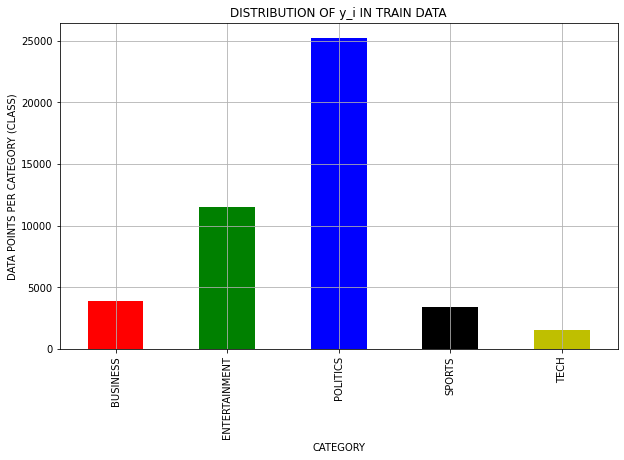

NUMBER OF DATA POINTS IN CLASS 3 : 25202 ( 55.294 %)
NUMBER OF DATA POINTS IN CLASS 2 : 11478 ( 25.183 %)
NUMBER OF DATA POINTS IN CLASS 1 : 3915 ( 8.59 %)
NUMBER OF DATA POINTS IN CLASS 4 : 3419 ( 7.501 %)
NUMBER OF DATA POINTS IN CLASS 5 : 1564 ( 3.431 %)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.


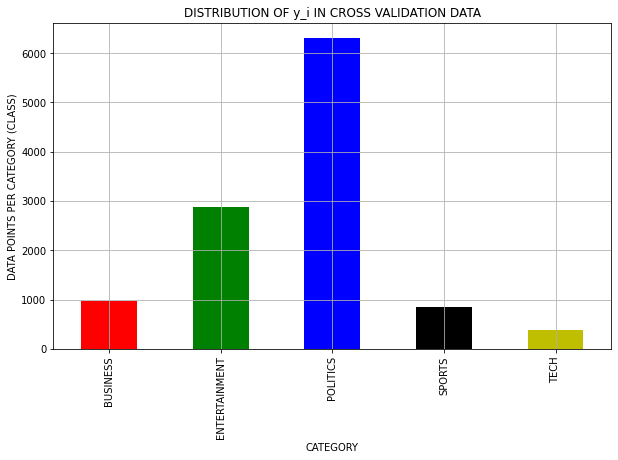

NUMBER OF DATA POINTS IN CLASS 3 : 6301 ( 55.296 %)
NUMBER OF DATA POINTS IN CLASS 2 : 2869 ( 25.178 %)
NUMBER OF DATA POINTS IN CLASS 1 : 979 ( 8.591 %)
NUMBER OF DATA POINTS IN CLASS 4 : 855 ( 7.503 %)
NUMBER OF DATA POINTS IN CLASS 5 : 391 ( 3.431 %)


In [14]:
#this_returns_a_dict_keys_as_class_labels_and_values_as_the_number_of_data_points_in_that_class

import numpy as np
train_class_distribution = X_train['Category'].value_counts().sort_index()
cv_class_distribution = X_cv['Category'].value_counts().sort_index()

#distribution_of y_i's_in_train_data
plt.figure(figsize=(10,6))
my_colors = ['r', 'g', 'b', 'k', 'y']
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('CATEGORY')
plt.ylabel('DATA POINTS PER CATEGORY (CLASS)')
plt.title('DISTRIBUTION OF y_i IN TRAIN DATA')
plt.grid()
plt.show()

#-(train_class_distribution.values):_the_minus_sign_will_returns_in_decreasing_order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('NUMBER OF DATA POINTS IN CLASS', i+1, ':',train_class_distribution.values[i],'(',np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3),'%)')

print("-."*50)
#distribution_of y_i's_in_cv_data
plt.figure(figsize=(10,6))
my_colors = ['r', 'g', 'b', 'k', 'y']
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('CATEGORY')
plt.ylabel('DATA POINTS PER CATEGORY (CLASS)')
plt.title('DISTRIBUTION OF y_i IN CROSS VALIDATION DATA')
plt.grid()
plt.show()

sorted_yi = np.argsort(-cv_class_distribution.values)
for i in sorted_yi:
    print('NUMBER OF DATA POINTS IN CLASS', i+1, ':',cv_class_distribution.values[i],'(',np.round((cv_class_distribution.values[i]/X_cv.shape[0]*100), 3),'%)')

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

text_vectorizer = CountVectorizer(min_df=3)
train_text_ohe = text_vectorizer.fit_transform(X_train['Text'])

#getting all the feature names (words)
train_text_features = text_vectorizer.get_feature_names()

#train_text_ohe.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_ohe.sum(axis=0).A1

#zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))

print("Total Number of Unique Words in Train Data :",len(train_text_features))

Total Number of Unique Words in Train Data : 15103


In [16]:
from sklearn.preprocessing import normalize #normalize every feature

train_text_ohe = normalize(train_text_ohe, axis=0)

#we use the same vectorizer that was trained on train data
cv_text_ohe = text_vectorizer.transform(X_cv['Text'])

#don't forget to normalize every feature
cv_text_ohe = normalize(cv_text_ohe, axis=0)

In [17]:
#this_function_plots_the_confusion_matrices_given_y_i_and_y_i_hat_
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):

    C = confusion_matrix(test_y, predict_y) #confusion_mat
    A =(((C.T)/(C.sum(axis=1))).T) #recall_mat
    B =(C/C.sum(axis=0)) #precision_mat
    
    labels = [1,2,3,4,5,6]
    
    #representing_C_in_heatmap_format
    print("-"*40, "Confusion Matrix", "-"*40)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_B_in_heatmap_format
    print("-"*40, "Precision Matrix (Columm Sum=1)", "-"*40)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_A_in_heatmap_format
    print("-"*40, "Recall Matrix (Row Sum=1)", "-"*40)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

For Alpha = 1e-05
Log Loss : 0.9153258676058917
For Alpha = 0.0001
Log Loss : 0.9013936067339233
For Alpha = 0.001
Log Loss : 0.8781610492216836
For Alpha = 0.1
Log Loss : 0.783501043377283
For Alpha = 1
Log Loss : 0.7586531765917977
For Alpha = 10
Log Loss : 0.8489501738780931
For Alpha = 100
Log Loss : 0.906449252774495
For Alpha = 1000
Log Loss : 0.913796363347381


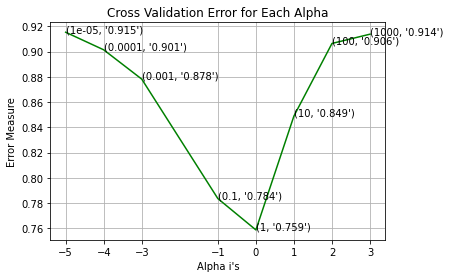

For values of best alpha = 1 The train log loss is: 0.6361055887456813
For values of best alpha = 1 The cross validation log loss is: 0.7586531765917977


In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]

cv_log_error_array = []

for i in alpha:
    print("For Alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_text_ohe, y_train)
    
    nb_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    nb_sig_clf.fit(train_text_ohe, y_train)
    
    sig_clf_probs = nb_sig_clf.predict_proba(cv_text_ohe)
    
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    #to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')

for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
    
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_text_ohe, y_train)

nb_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
nb_sig_clf.fit(train_text_ohe, y_train)

predict_y = nb_sig_clf.predict_proba(train_text_ohe)
print('For values of best alpha =', alpha[best_alpha],"The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = nb_sig_clf.predict_proba(cv_text_ohe)
print('For values of best alpha =', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

In [19]:
from sklearn.metrics import accuracy_score
predicted_y = nb_sig_clf.predict(cv_text_ohe)
train_accuracy = (nb_sig_clf.score(train_text_ohe, y_train)*100)
cv_accuracy = (accuracy_score(predicted_y, y_cv)*100)

print("Naive Bayes Train Accuracy -",train_accuracy)
print("Naive Bayes CV Accuracy -",cv_accuracy)

Naive Bayes Train Accuracy - 77.08543595594367
Naive Bayes CV Accuracy - 73.33918385256692


---------------------------------------- Confusion Matrix ----------------------------------------


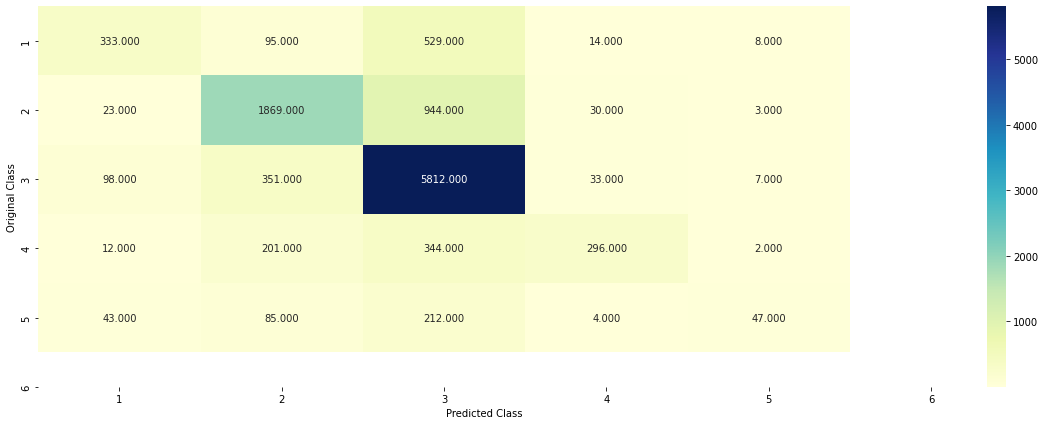

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


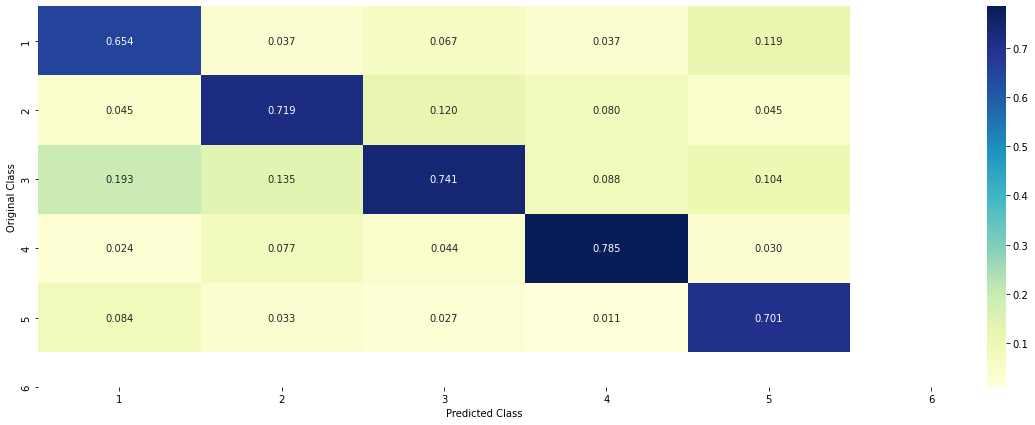

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


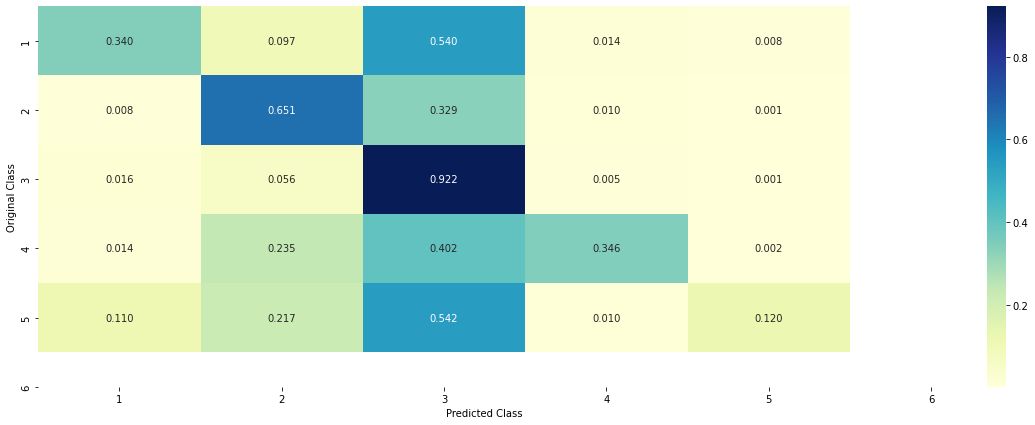

In [20]:
plot_confusion_matrix(y_cv, nb_sig_clf.predict(cv_text_ohe.toarray()))

In [21]:
from sklearn.metrics import classification_report
print(classification_report(predicted_y, y_cv, target_names=target_category))

               precision    recall  f1-score   support

         TECH       0.34      0.65      0.45       509
       SPORTS       0.65      0.72      0.68      2601
ENTERTAINMENT       0.92      0.74      0.82      7841
     POLITICS       0.35      0.79      0.48       377
     BUSINESS       0.12      0.70      0.21        67

     accuracy                           0.73     11395
    macro avg       0.48      0.72      0.53     11395
 weighted avg       0.81      0.73      0.76     11395



For values of alpha = 1e-05 The log loss is: 0.7106857645173438
For values of alpha = 0.0001 The log loss is: 0.7157166385370963
For values of alpha = 0.001 The log loss is: 0.7166124498124538
For values of alpha = 0.01 The log loss is: 0.771926292261815
For values of alpha = 0.1 The log loss is: 0.9378134131865323
For values of alpha = 1 The log loss is: 0.9701830688180522


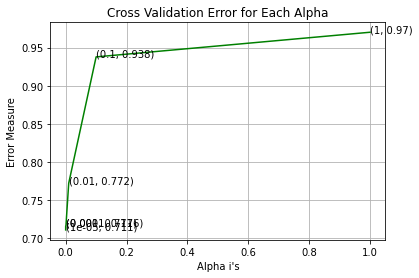

For values of best alpha = 1e-05 The train log loss is: 0.46869797681611713
For values of best alpha = 1e-05 The cross validation log loss is: 0.7106857645173438


In [22]:
from sklearn.linear_model import LogisticRegression

#train a logistic regression + calibration model using text features which are one-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42) #loss='log'_means_logistic_regression
    clf.fit(train_text_ohe, y_train)
    
    lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    lr_sig_clf.fit(train_text_ohe, y_train)
    
    predict_y = lr_sig_clf.predict_proba(cv_text_ohe)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    
    print('For values of alpha =',i,"The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
    
plt.grid()
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_ohe, y_train)

lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
lr_sig_clf.fit(train_text_ohe, y_train)

predict_y = lr_sig_clf.predict_proba(train_text_ohe)
print('For values of best alpha =', alpha[best_alpha],"The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = lr_sig_clf.predict_proba(cv_text_ohe)
print('For values of best alpha =', alpha[best_alpha],"The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

In [23]:
predicted_y = lr_sig_clf.predict(cv_text_ohe)
train_accuracy = (lr_sig_clf.score(train_text_ohe, y_train)*100)
cv_accuracy = (accuracy_score(predicted_y, y_cv)*100)

print("Logistic Regression Train Accuracy -",train_accuracy)
print("Logistic Regression CV Accuracy -",cv_accuracy)

Logistic Regression Train Accuracy - 84.88525165650096
Logistic Regression CV Accuracy - 76.92847740236945


---------------------------------------- Confusion Matrix ----------------------------------------


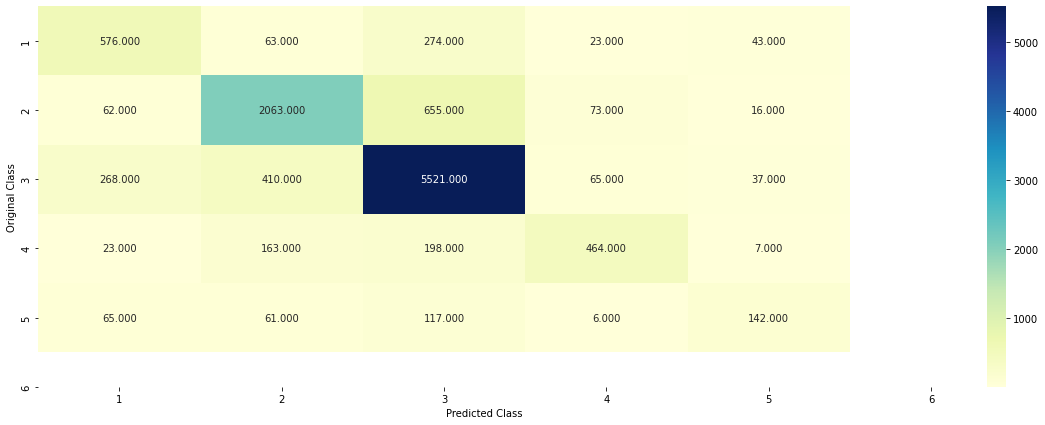

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


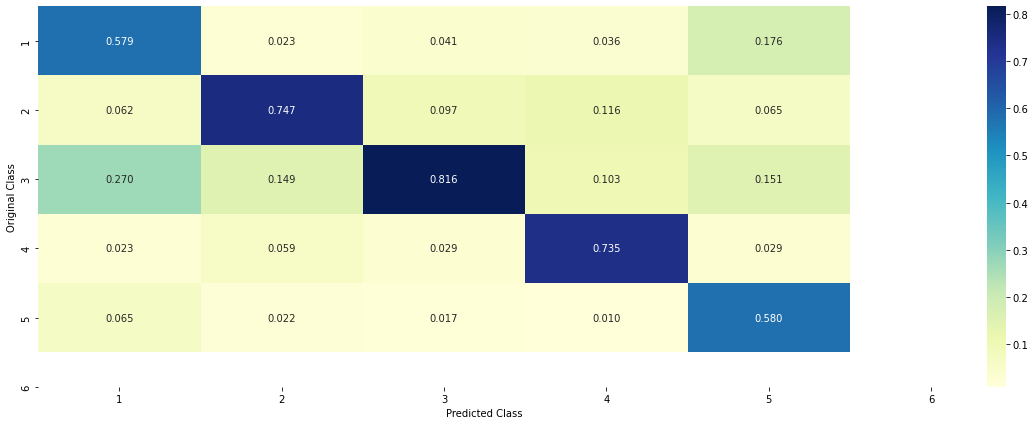

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


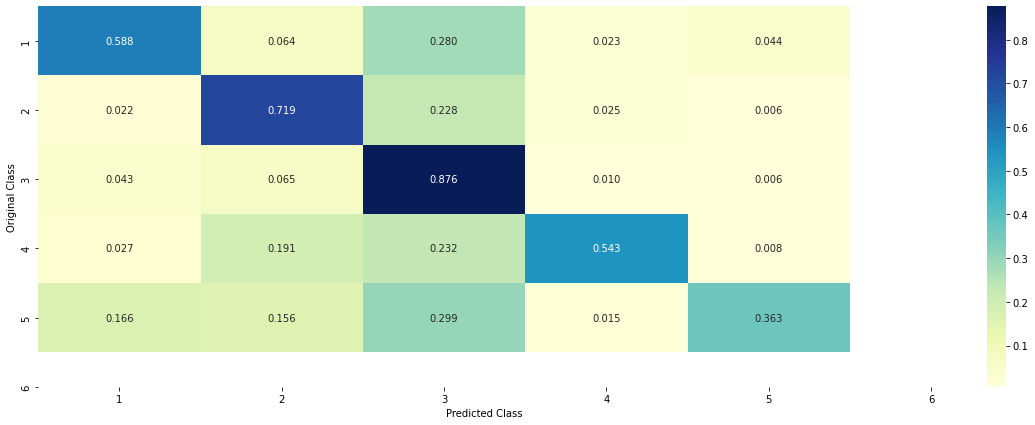

In [24]:
plot_confusion_matrix(y_cv, lr_sig_clf.predict(cv_text_ohe.toarray()))

for alpha = 5
Log Loss : 1.01147403731129
for alpha = 11
Log Loss : 0.9931250242219265
for alpha = 15
Log Loss : 0.9991334902852897
for alpha = 21
Log Loss : 1.0120389594490928
for alpha = 31
Log Loss : 1.0334364893837942
for alpha = 41
Log Loss : 1.0486825597646758
for alpha = 51
Log Loss : 1.0605072194502765
for alpha = 99
Log Loss : 1.0857036746514288


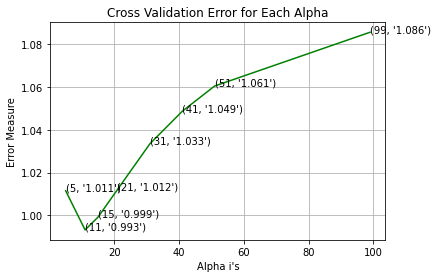

For values of best alpha = 11 The train log loss is: 0.930099481609052
For values of best alpha = 11 The cross validation log loss is: 0.9931250242219265


In [25]:
from sklearn.neighbors import KNeighborsClassifier

alpha = [5, 11, 15, 21, 31, 41, 51, 99]

cv_log_error_array = []

for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i) 
    clf.fit(train_text_ohe, y_train) #knn may not good at handling large dimensionality
    
    knn_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    knn_sig_clf.fit(train_text_ohe, y_train)
    
    sig_clf_probs = knn_sig_clf.predict_proba(cv_text_ohe)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    #to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for Each Alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error Measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_text_ohe, y_train)

knn_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
knn_sig_clf.fit(train_text_ohe, y_train)

predict_y = knn_sig_clf.predict_proba(train_text_ohe)
print('For values of best alpha =', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = knn_sig_clf.predict_proba(cv_text_ohe)
print('For values of best alpha =', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))


In [26]:
predicted_y = knn_sig_clf.predict(cv_text_ohe)
train_accuracy = (knn_sig_clf.score(train_text_ohe, y_train)*100)
cv_accuracy = (accuracy_score(predicted_y, y_cv)*100)

print("K Nearest Neighbor Train Accuracy -",train_accuracy)
print("K Nearest Neighbor CV Accuracy -",cv_accuracy)

K Nearest Neighbor Train Accuracy - 63.23006713765413
K Nearest Neighbor CV Accuracy - 60.93023255813953
